# Day 11: Seating System

Your plane lands with plenty of time to spare. The final leg of your journey is a ferry that goes directly to the tropical island where you can finally start your vacation. As you reach the waiting area to board the ferry, you realize you're so early, nobody else has even arrived yet!

By modeling the process people use to choose (or abandon) their seat in the waiting area, you're pretty sure you can predict the best place to sit. You make a quick map of the seat layout (your puzzle input).

The seat layout fits neatly on a grid. Each position is either floor (.), an empty seat (L), or an occupied seat (#). For example, the initial seat layout might look like this:

```
L.LL.LL.LL
LLLLLLL.LL
L.L.L..L..
LLLL.LL.LL
L.LL.LL.LL
L.LLLLL.LL
..L.L.....
LLLLLLLLLL
L.LLLLLL.L
L.LLLLL.LL
```
Now, you just need to model the people who will be arriving shortly. Fortunately, people are entirely predictable and always follow a simple set of rules. All decisions are based on the number of occupied seats adjacent to a given seat (one of the eight positions immediately up, down, left, right, or diagonal from the seat). The following rules are applied to every seat simultaneously:

If a seat is empty (L) and there are no occupied seats adjacent to it, the seat becomes occupied.
If a seat is occupied (#) and four or more seats adjacent to it are also occupied, the seat becomes empty.
Otherwise, the seat's state does not change.
Floor (.) never changes; seats don't move, and nobody sits on the floor.

After one round of these rules, every seat in the example layout becomes occupied:

```
#.##.##.##
#######.##
#.#.#..#..
####.##.##
#.##.##.##
#.#####.##
..#.#.....
##########
#.######.#
#.#####.##
```
After a second round, the seats with four or more occupied adjacent seats become empty again:
```
#.LL.L#.##
#LLLLLL.L#
L.L.L..L..
#LLL.LL.L#
#.LL.LL.LL
#.LLLL#.##
..L.L.....
#LLLLLLLL#
#.LLLLLL.L
#.#LLLL.##
```
This process continues for three more rounds:
```
#.##.L#.##
#L###LL.L#
L.#.#..#..
#L##.##.L#
#.##.LL.LL
#.###L#.##
..#.#.....
#L######L#
#.LL###L.L
#.#L###.##
#.#L.L#.##
#LLL#LL.L#
L.L.L..#..
#LLL.##.L#
#.LL.LL.LL
#.LL#L#.##
..L.L.....
#L#LLLL#L#
#.LLLLLL.L
#.#L#L#.##
#.#L.L#.##
#LLL#LL.L#
L.#.L..#..
#L##.##.L#
#.#L.LL.LL
#.#L#L#.##
..L.L.....
#L#L##L#L#
#.LLLLLL.L
#.#L#L#.##
```

At this point, something interesting happens: the chaos stabilizes and further applications of these rules cause no seats to change state! Once people stop moving around, you count 37 occupied seats.

Simulate your seating area by applying the seating rules repeatedly until no seats change state. How many seats end up occupied?

In [1]:
import numpy as np

In [2]:
with open("inputs/11.txt") as input_file:
    input = input_file.read()
    
seatplan = [[seat for seat in row] for row in input.splitlines()]
seatplan = np.asarray(seatplan, dtype="S1")

In [4]:
%%time
FLOOR = b"."
OCCUPIED = b"#"
FREE = b"L"

def num_occupied(seatplan, x, y):
    check_seats = np.array([
        [x, y],   [x+1,y], [x+2, y  ],
        [x, y+1],            [x+2, y+1],
        [x, y+2], [x+1,y+2], [x+2, y+2]  
    ])
    
    x_coords = check_seats[:, 0]
    y_coords = check_seats[:, 1]
    
    padded_plan = np.pad(seatplan, pad_width=1, mode="constant", constant_values=FLOOR)
    frame = padded_plan[x_coords, y_coords]
    return np.sum(frame == OCCUPIED)
    
def iterate_seatplan(old_seatplan):
    new_plan = old_seatplan.copy()
    for x, y in np.ndindex(old_seatplan.shape):
        occupied = num_occupied(old_seatplan, x, y)
        if old_seatplan[x,y] == OCCUPIED and occupied >= 4:
            new_plan[x, y] = FREE
        elif old_seatplan[x, y] == FREE and occupied == 0:
            new_plan[x,y]=OCCUPIED
    return new_plan

def calc_seatplan(seatplan):
    old_plan = seatplan.copy()
    while True:
        new_plan = iterate_seatplan(old_plan)
        if np.array_equal(old_plan, new_plan):
            break
        old_plan = new_plan
    num_occupied_seats = np.sum(new_plan == OCCUPIED)
    print(num_occupied_seats)

calc_seatplan(seatplan)

2265
CPU times: user 37.1 s, sys: 651 ms, total: 37.7 s
Wall time: 38.6 s


In [5]:
from scipy import ndimage

In [10]:
%%time
def iterate_seatplan_smart(old_plan):
    new_plan = old_plan.copy()
    int_plan = (old_plan == OCCUPIED).astype(np.int32)
    kernel = [
        [1,1,1],
        [1,0,1],
        [1,1,1],
    ]
    
    occupancy_plan = ndimage.convolve(int_plan, kernel, mode="constant", cval=0)

    to_be_occupied = np.where((occupancy_plan == 0) & (old_plan == FREE))
    to_be_freed = np.where((occupancy_plan >= 4) & (old_plan == OCCUPIED))
    new_plan[to_be_occupied] = OCCUPIED
    new_plan[to_be_freed] = FREE
    return new_plan

def calc_seatplan_smart(seatplan):
    old_plan = seatplan.copy()
    while True:
        new_plan = iterate_seatplan_smart(old_plan)
        if np.array_equal(old_plan, new_plan):
            break
        old_plan = new_plan
    num_occupied_seats = np.sum(new_plan == OCCUPIED)
    print(num_occupied_seats)
    
calc_seatplan_smart(seatplan)

2265
CPU times: user 60.4 ms, sys: 3.5 ms, total: 63.9 ms
Wall time: 63.3 ms


In [11]:
print(x[[1,2,2],:])
x[[1,2,2,2,2,2,2,2,2],[1,2,2,2,2,2,2,2,2]]

NameError: name 'x' is not defined

Your puzzle answer was 2265.

In [12]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

In [13]:
x=["H", "a", "l"]
for index, letter in enumerate(x):
    print(letter, index)

H 0
a 1
l 2


In [15]:
img=cv2.imread("python-logo.png")
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [16]:
%%time
for y, row_data in enumerate(img):
    for x, pixel in enumerate(row_data):
        for z, value in enumerate(pixel):
            img[y,x,z] = value/2

CPU times: user 257 ms, sys: 7.08 ms, total: 264 ms
Wall time: 268 ms


In [17]:
x = np.arange(12).reshape(3,4)
y = np.arange(4)

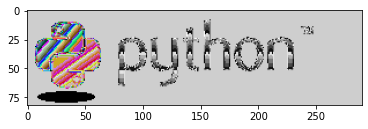

In [18]:
plt.imshow(img * 50)

In [19]:
x=[[1,2,3],[1,2,4]]

In [23]:
x + 1

TypeError: can only concatenate list (not "int") to list